In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

column_names = ['hpso', 'simulation_type', 'time', 'graph', 'telescope', 'nodes', 'channels', 'data', 'pipeline_sets']
plt_dir = Path("/home/rwb/github/thesis_experiments/chapter3/initial_results/plots/")

df = pd.read_csv('results_2023-09-23.csv',header=None,names=column_names)
df = df.drop_duplicates()

# Need to transform data of each row into the form: 
# Telescope| experiment approach | time | with  data

hpso_obs = set(df['hpso'])

# Isolate single HPSO01 and only pick 896 channels (although 512 doesn't appear to make a difference)
grouped_hpsos = df.groupby(["simulation_type",'data'])

xaxis = {
    "False":"Parametric",
    "no_data":"Workflow,\n Prototype",
    "edges":"Workflow,\n Prototype - Edge Data",
    "task_edges":"Workflow,\n Prototype - Edge + Task Data"}

In [75]:
# Store parametric in combined data frame
df_overview = pd.DataFrame()
df_parametric = df_overview.append(grouped_hpsos.get_group(('parametric', 'False')), ignore_index=True).sort_values(by='hpso')
df_parametric['Workflow Type'] = "Parametric"

for data in ['no_data', 'edges', 'task_edges']:
    
    df_tmp = pd.DataFrame()
    df_tmp = df_tmp.append(grouped_hpsos.get_group(('workflow', data)), ignore_index=True).sort_values(by='hpso')
    df_tmp['ratio'] = (np.array(df_tmp['time']) / np.array(df_parametric['time']))
    df_tmp['Workflow Type'] = xaxis[data]
    df_overview = df_overview.append(df_tmp, ignore_index=True)


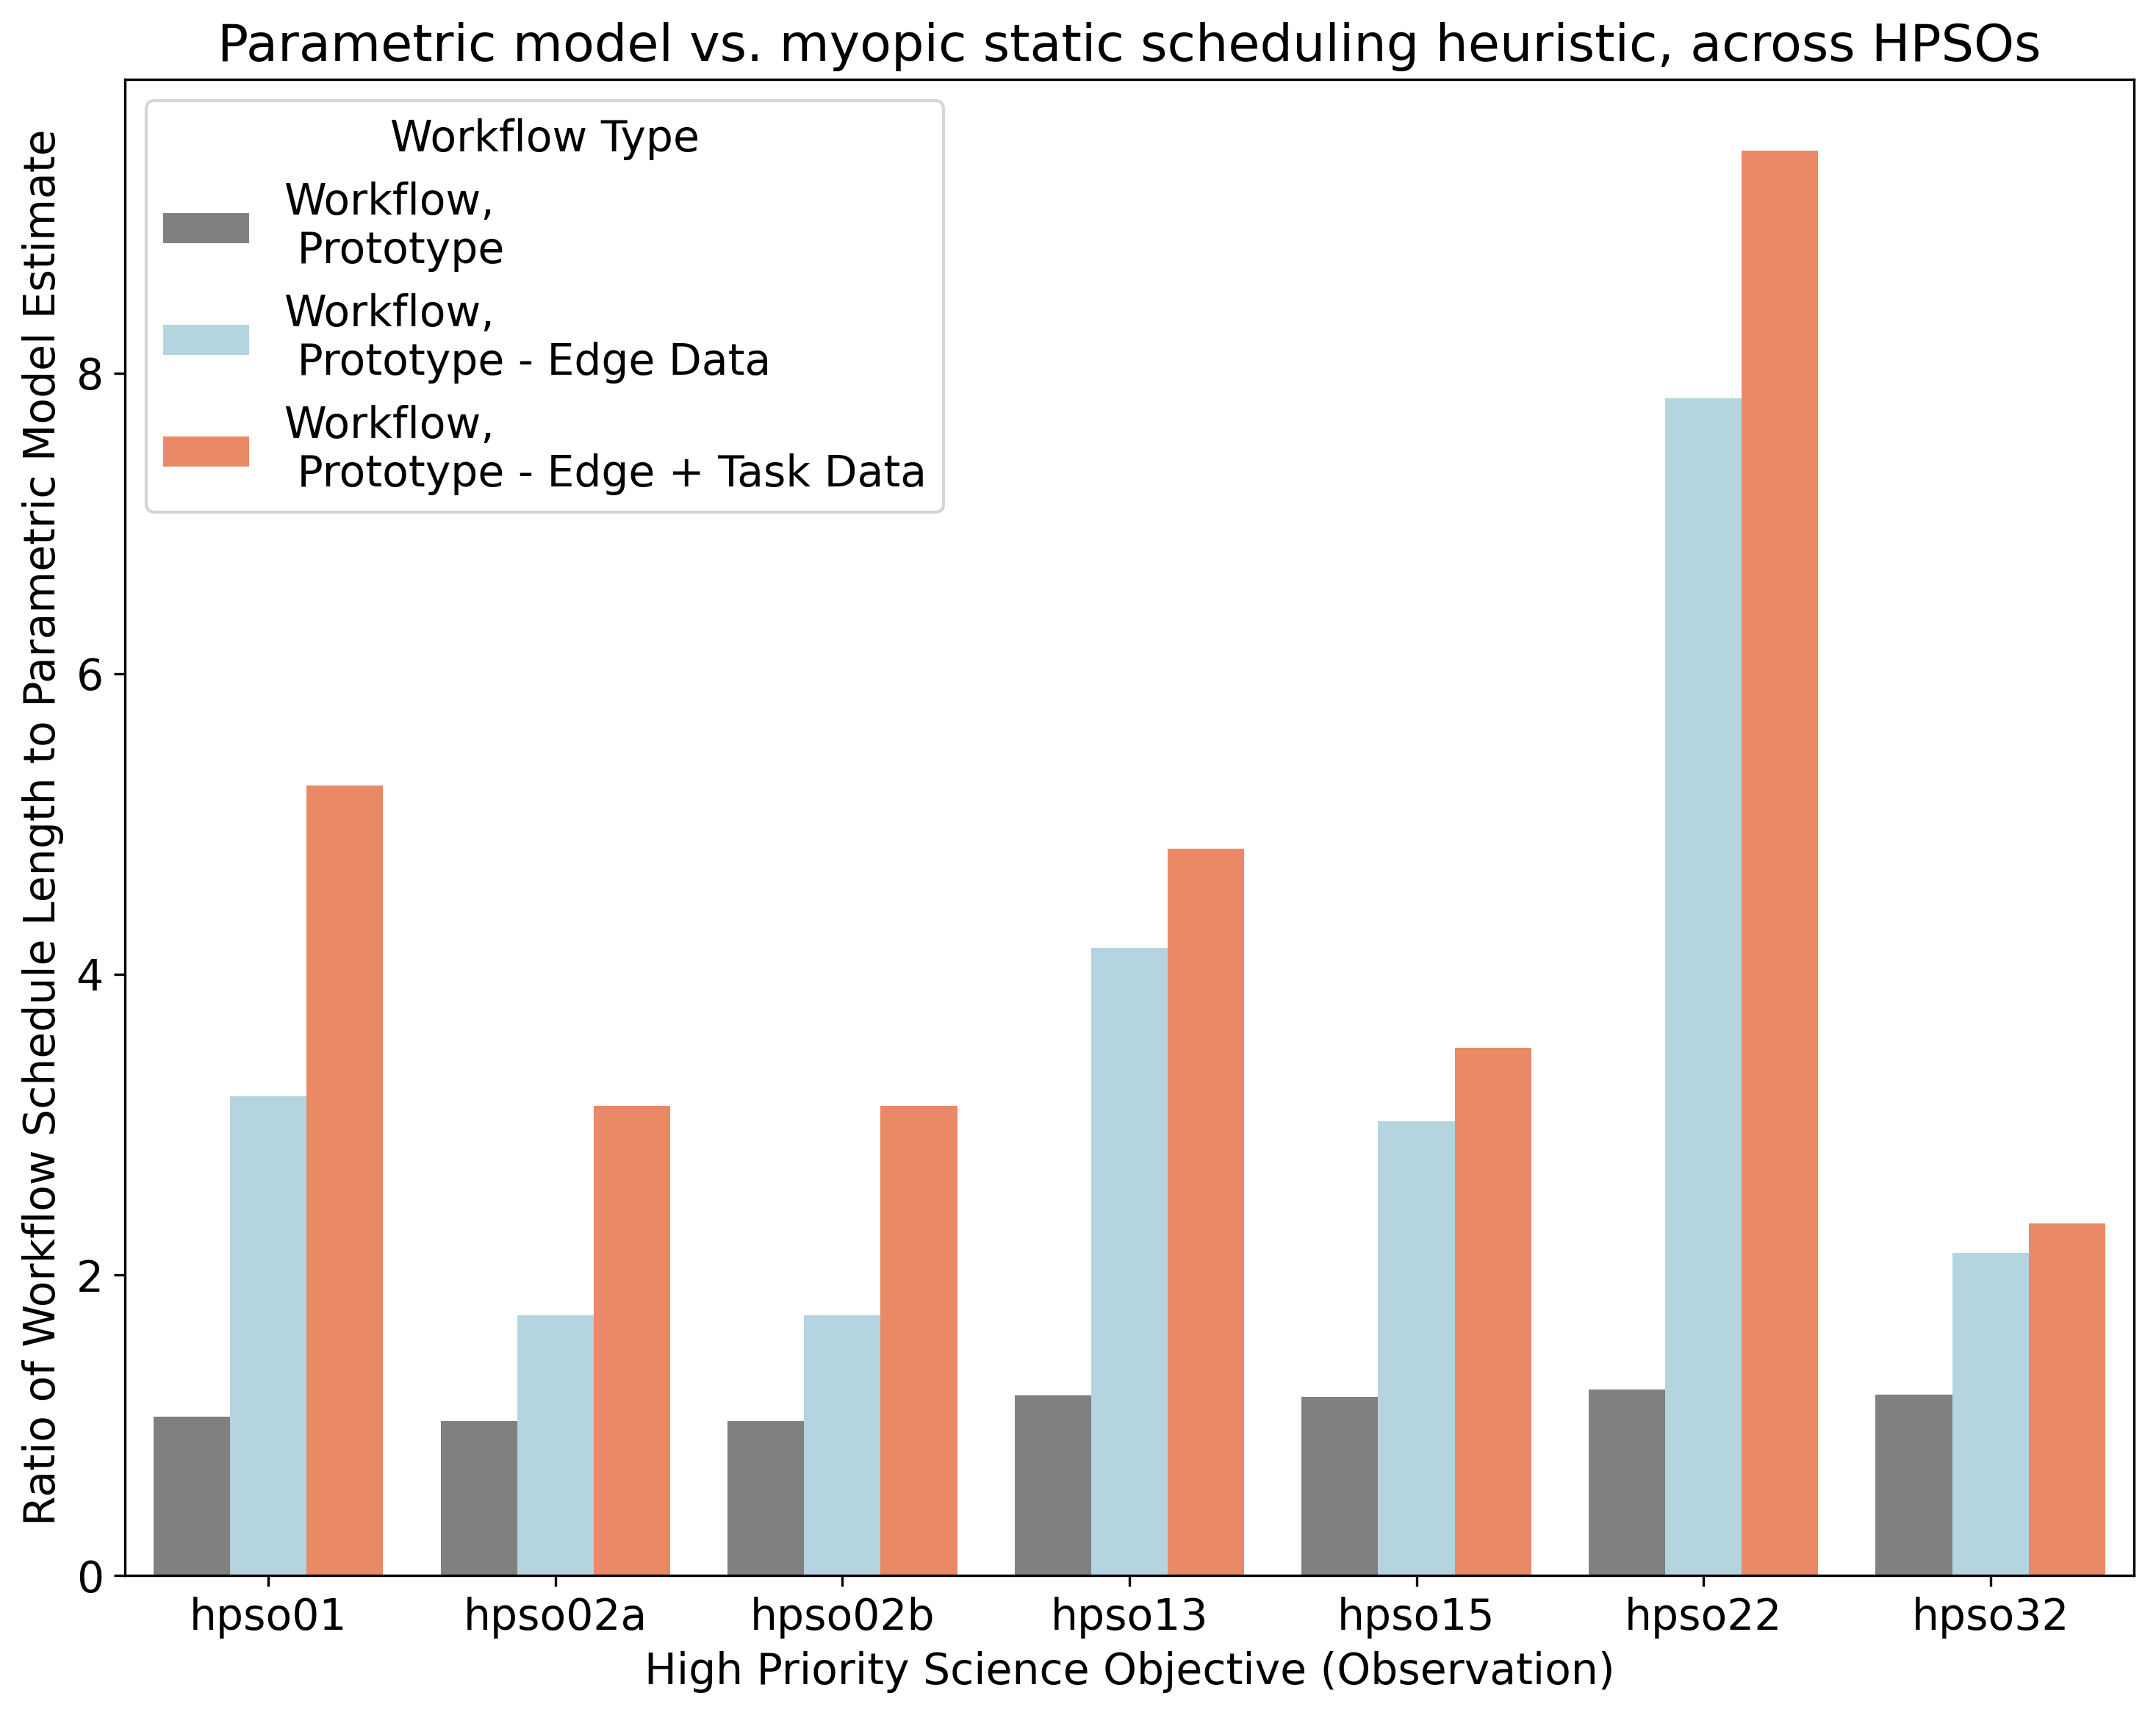

In [79]:
plt.rcParams.update({'font.size': 14})

f, ax = plt.subplots(ncols=1,nrows=1 ,figsize=(10,8), sharey=True, dpi=300, tight_layout=True)
from matplotlib.patches import Patch
g = sns.barplot(
    data=df_overview, y='ratio', x='hpso',
    hue='Workflow Type', 
    hue_order=[xaxis['no_data'],xaxis['edges'],xaxis['task_edges']],
    palette=['grey','lightblue','coral']
) # hue='xaxis')#, kind="box")

# patches=['x','o','/']
# for i, b in enumerate(g.patches): 
#     x = int(i/7)
#     if x > 2:
#         break
#     b.set_hatch(patches[x])
    
# patch_1 = Patch(fill=False, label=xaxis['no_data'], hatch='x')
# patch_2 = Patch(fill=False, label=xaxis['no_data'], hatch='o')
# patch_3 = Patch(fill=False, label=xaxis['no_data'], hatch='/')

g.set_title("Parametric model vs. myopic static scheduling heuristic, across HPSOs")
g.set_xlabel("High Priority Science Objective (Observation)")
g.set_ylabel("Ratio of Workflow Schedule Length to Parametric Model Estimate")
# g.legend(handles=[patch_1, patch_2, patch_3], loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fancybox=True, shadow=True)
g.tick_params(labelleft=True)
plt.savefig(plt_dir / "SchedulingComparisons_2023-09-23.png", facecolor="white", transparent=False, bbox_inches="tight")